## Part B: News Article Classification

In [101]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1. Data Exploration and Preprocessing

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/PGC/data_news.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(10)

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods
5,WELLNESS,Bad Love Advice: 9 Lessons To Unlearn,https://www.huffingtonpost.com/entry/bad-love-...,"By Carey Moss for YouBeauty.com Love rom-coms,...",bad-love-advice-from-movies
6,WELLNESS,The Happiest (And Unhappiest) States In The U.S.,https://www.huffingtonpost.com/entry/happiest-...,The nation in general scored a 66.2 in 2011 on...,happiest-state-well-being-united-states-gallup
7,WELLNESS,Seaweed: The Green Superfood You're Not Eating...,https://www.huffingtonpost.com/entry/superfood...,It's also worth remembering that if the water ...,superfood-seaweed-health-benefits
8,WELLNESS,Addicted to Food?,https://www.huffingtonpost.com/entry/food-addi...,"If you look at our culture's eating behavior, ...",food-addiction
9,WELLNESS,High Tech Works When It Enables High Touch,https://www.huffingtonpost.com/entry/high-tech...,"François-Marie Arouet, 18th century French aut...",high-tech-works-when-it-e


In [ ]:
data.shape

(50000, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [ ]:
# check for missing values
data.isnull().sum()#display the best parameters


,0
category,0
headline,0
links,0
short_description,0
keywords,2668


In [ ]:
# Fill missing values in 'keywords'
data['keywords'] = data['keywords'].fillna('no_keywords')

#data['keywords'].fillna('', inplace=True)

In [ ]:
# check for missing values again
data.isnull().sum()

,0
category,0
headline,0
links,0
short_description,0
keywords,0


In [ ]:
# Merge 'headline', 'short_description', and 'keywords'
data['text'] = data['headline'] + " " + data['short_description'] + " " + data['keywords']

In [ ]:
data['text'].isnull().sum()

0

In [ ]:
data['category'].value_counts()

,count
category,
WELLNESS,5000
POLITICS,5000
ENTERTAINMENT,5000
TRAVEL,5000
STYLE & BEAUTY,5000
PARENTING,5000
FOOD & DRINK,5000
WORLD NEWS,5000
BUSINESS,5000


In [ ]:
# Text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(word) for word in tokens]
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Return the preprocessed text
    return ' '.join(tokens)

In [ ]:
data['cleaned_text'] = data['text'].apply(preprocess_text)


In [ ]:
data['cleaned_text'].head(10)

,cleaned_text
0,mile day lesson learned resting part training ...
1,talking crazy crazy helpful think talking tool...
2,crenezumab trial gauge whether alzheimers drug...
3,oh difference made want busy keep trying perfe...
4,green superfoods first bad news soda bread cor...
5,bad love advice lesson unlearn carey moss youb...
6,happiest unhappiest state u nation general sco...
7,seaweed green superfood youre eating also wort...
8,addicted food look culture eating behavior cer...
9,high tech work enables high touch franoismarie...


In [ ]:
# convert category (target) column to numeric
le = LabelEncoder()
data['category_num'] = le.fit_transform(data['category'])

In [ ]:
#Display the label encoding mapping
print("\nLabel Encoding Mapping:\n")
for key, value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{key}: {value}\n")


Label Encoding Mapping:

BUSINESS: 0

ENTERTAINMENT: 1

FOOD & DRINK: 2

PARENTING: 3

POLITICS: 4

SPORTS: 5

STYLE & BEAUTY: 6

TRAVEL: 7

WELLNESS: 8

WORLD NEWS: 9



### 2. Feature Engineering

In [ ]:
# Define features and target
X = data['cleaned_text']
y = data['category_num']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### 3. Model Development and Training

### 4. Model Evaluation

In [ ]:
# Logistic Regression (Before Hyperparameter Tuning)
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [ ]:
# Support Vector Machine (Before Hyperparameter Tuning)
svc = LinearSVC(random_state=42)
svc.fit(X_train_tfidf, y_train)
y_pred_svc = svc.predict(X_test_tfidf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

In [ ]:
# Hyperparameter Tuning - Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['sag', 'liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=200), param_grid_lr, cv=3, scoring='accuracy')
grid_lr.fit(X_train_tfidf, y_train)

In [ ]:
# Evaluate tuned Logistic Regression
best_lr = grid_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test_tfidf)
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)

In [ ]:
#display the best parameters
best_lr

In [ ]:
# Hyperparameter Tuning - SVM
param_grid_svc = {
    'C': [0.1, 1,10]
}
grid_svc = GridSearchCV(LinearSVC(random_state=42), param_grid_svc, cv=3, scoring='accuracy')
grid_svc.fit(X_train_tfidf, y_train)


In [ ]:
# Evaluate tuned SVM
best_svc = grid_svc.best_estimator_
y_pred_best_svc = best_svc.predict(X_test_tfidf)
accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)

In [ ]:
#display the best parameters
best_svc

In [ ]:
# Comparison Table
results = [
    ["Logistic Regression (Before Hyperparameter Tuning)", accuracy_lr],
    ["SVM (Before Hyperparameter Tuning)", accuracy_svc],
    ["Logistic Regression (After Hyperparameter Tuning)", accuracy_best_lr],
    ["SVM (After Hyperparameter Tuning)", accuracy_best_svc]
]

print("\nModel Performance Comparison:")
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="grid"))


Model Performance Comparison:
+----------------------------------------------------+------------+
| Model                                              |   Accuracy |
+====================================================+============+
| Logistic Regression (Before Hyperparameter Tuning) |     0.7995 |
+----------------------------------------------------+------------+
| SVM (Before Hyperparameter Tuning)                 |     0.7886 |
+----------------------------------------------------+------------+
| Logistic Regression (After Hyperparameter Tuning)  |     0.7995 |
+----------------------------------------------------+------------+
| SVM (After Hyperparameter Tuning)                  |     0.8014 |
+----------------------------------------------------+------------+


In [ ]:
# Detailed Classification Reports
print("\nLogistic Regression (Before Hyperparameter Tuning)")
print(classification_report(y_test, y_pred_lr))

print("\nSVM (Before Hyperparameter Tuning)")
print(classification_report(y_test, y_pred_svc))

print("\nLogistic Regression (After Hyperparameter Tuning)")
print(classification_report(y_test, y_pred_best_lr))

print("\nSVM (After Hyperparameter Tuning)")
print(classification_report(y_test, y_pred_best_svc))


Logistic Regression (Before Hyperparameter Tuning)
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       955
           1       0.78      0.78      0.78       985
           2       0.85      0.82      0.84      1021
           3       0.79      0.77      0.78      1030
           4       0.79      0.74      0.77      1034
           5       0.87      0.89      0.88       995
           6       0.86      0.85      0.85       986
           7       0.83      0.80      0.82      1008
           8       0.73      0.76      0.74      1009
           9       0.79      0.81      0.80       977

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000


SVM (Before Hyperparameter Tuning)
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       955
           1       0.78      0.75      0.77 

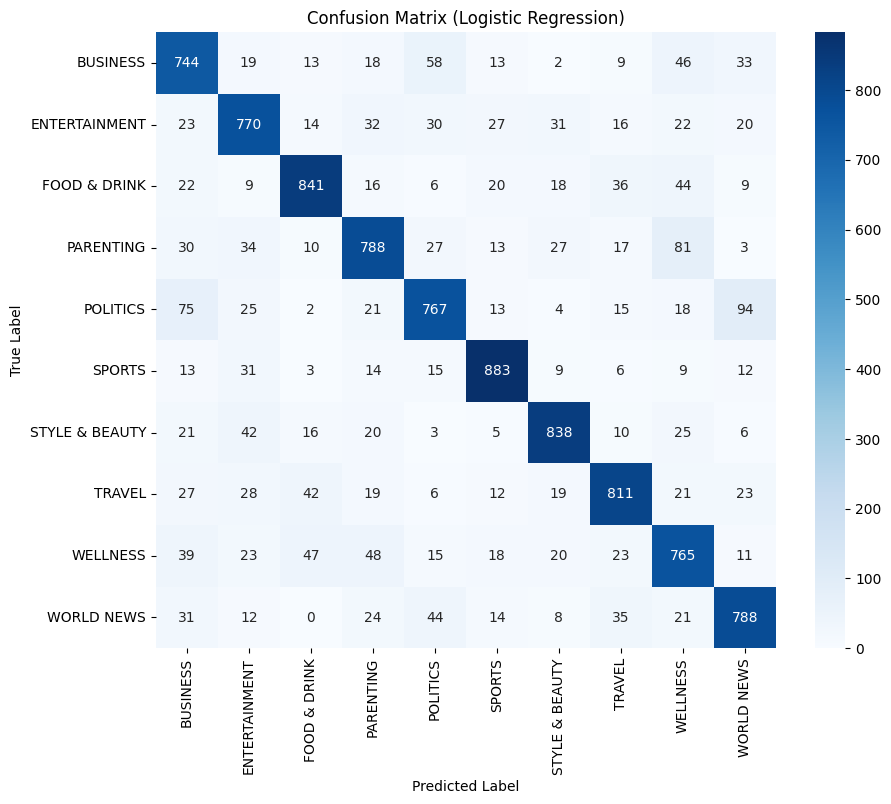

In [103]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
labels = le.classes_  # Class labels (category names)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

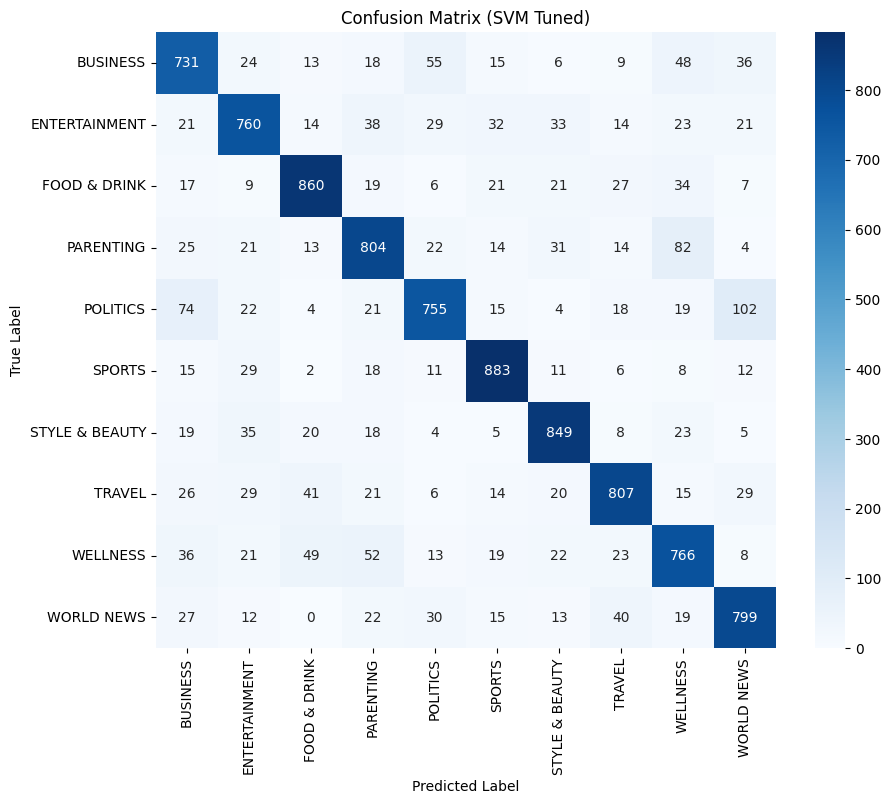

In [105]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best_svc)
labels = le.classes_  # Class labels (category names)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (SVM Tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [1]:
# Summary
print("Models evaluated and results summarized.")

Models evaluated and results summarized.
